<a href="https://colab.research.google.com/github/MathPhysSim/ML-COFFEE-AAE/blob/master/Example_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello everybody to the legendary ML coffee
Autor: Simon Hirlaender
simon.hirlaender@cern.ch

Lets mount google drive:

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Did it work?

In [0]:
!ls "/content/drive/My Drive"

Use python to create a new directory (can be done in many way ;))

In [0]:
import os
dir_name = "/content/drive/My Drive/ML_Coffee_CERN/"
os.mkdir(dir_name)

Did it work?

In [0]:
!ls "/content/drive/My Drive"

Change working directory of python to the new directory:

In [26]:
os.chdir(dir_name)
os.getcwd()

'/content/drive/My Drive/ML_Coffee_CERN'

Clone the git to have the private files on colab:

In [27]:
! if test -d my_module; then rm -R my_module; fi
!git clone https://github.com/MathPhysSim/ML-COFFE-AAE.git my_module

Cloning into 'my_module'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 129 (delta 69), reused 65 (delta 28), pack-reused 0
Receiving objects: 100% (129/129), 758.58 KiB | 1.92 MiB/s, done.
Resolving deltas: 100% (69/69), done.


Lets load the libraries to into python:

Using TensorFlow backend.


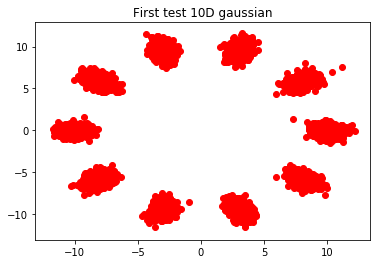

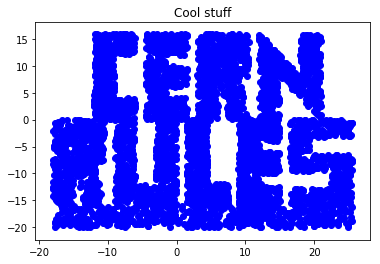

In [28]:
import my_module
import my_module.helpers as helpers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Interlude: check the availability of GPU!
What did google provide us:

In [0]:
from tensorflow.python.client import device_lib
!cat /proc/cpuinfo
!cat /proc/meminfo

Now check if a gpu can run:

In [31]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


What is the expected increase in performance:

In [34]:
import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/device:GPU:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Ensure that TF can detect the GPU.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))
print('Not too bad lets continue')

sess.close()

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.5543829090000827
GPU (s):
0.1669185139999172
GPU speedup over CPU: 21x


Time to run the AAE stuff:

11493376/11490434 [==============================] - 1s 0us/step


W0705 12:23:10.627464 139974856767360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 12:23:10.629148 139974856767360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 12:23:10.644692 139974856767360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 12:23:10.860311 139974856767360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 12:23:10.870028 139974856767360 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2002      
Total params: 1,788,002
Trainable params: 1,788,002
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              3000      
_________________________________________________________________


W0705 12:23:15.163401 139974856767360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.724686, acc: 12.50%] [G acc: 1.000000, mse: 0.231262]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/0.png


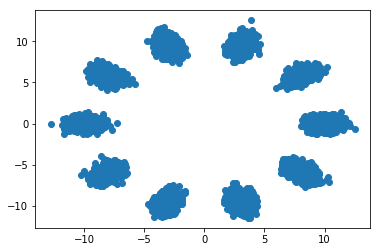

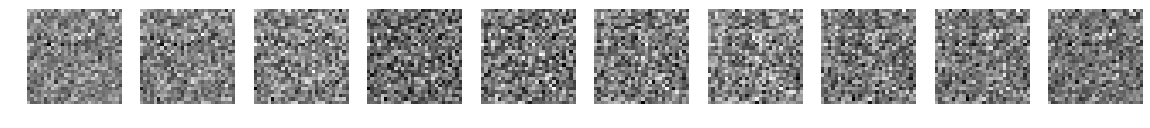

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_0.png


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


400 [D loss: 0.503254, acc: 79.69%] [G acc: 0.125000, mse: 0.060173]


KeyboardInterrupt: ignored

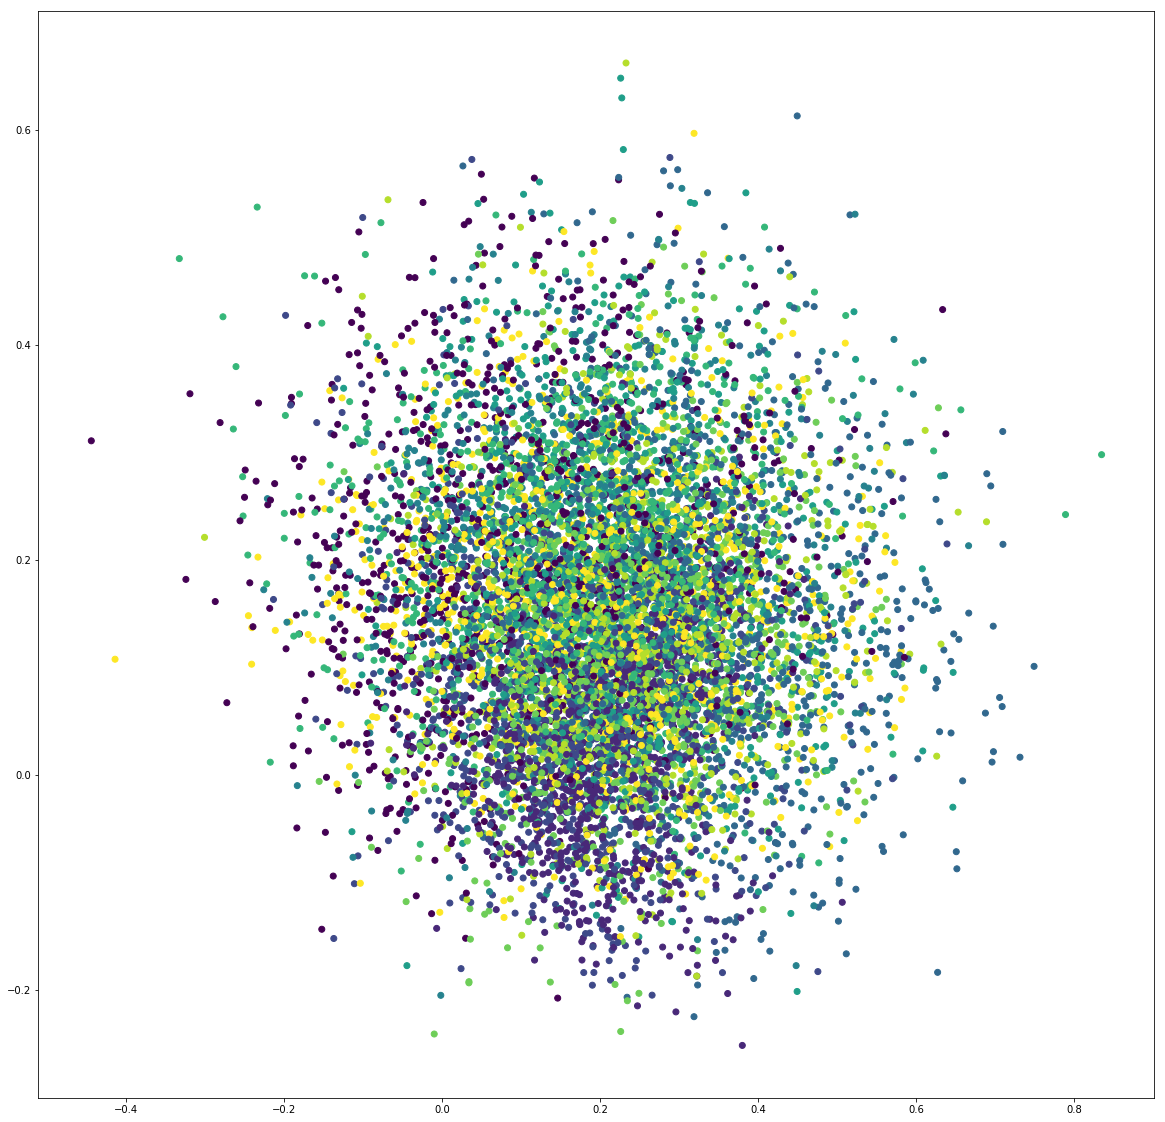

In [35]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
idx_unlabel = np.random.randint(0, x_train.shape[0], 20000)
y_train[idx_unlabel] = 10
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

# Load classes from module and start the training
ann = my_module.SSAAE(type='no so cool')
vecs, b = ann.generateRandomVectors(1000 * list(range(10)))
plt.scatter(vecs[:, 0], vecs[:, 1])
ann.train(x_train, y_train, x_test, y_test, epochs=int(2e4), 
          save_interval = 2000, batch_size=32)

# Print the results
vecs, b = ann.generateRandomVectors(1000 * list(range(10)))
generated = ann.decoder.predict(vecs)
print(generated.shape)
L = helpers.approximateLogLiklihood(generated, x_test)
print("Log Likelihood")
print(L)

In [0]:
from google.colab import files

files.download('/content/drive/My Drive/ML-Coffee_CERN/images/SSAAE/0.png')

# To try:
The Letter distribution

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 2002      
Total params: 1,788,002
Trainable params: 1,788,002
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              3000      
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.677639, acc: 29.69%] [G acc: 1.000000, mse: 0.232487]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/0.png


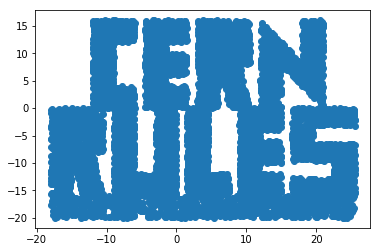

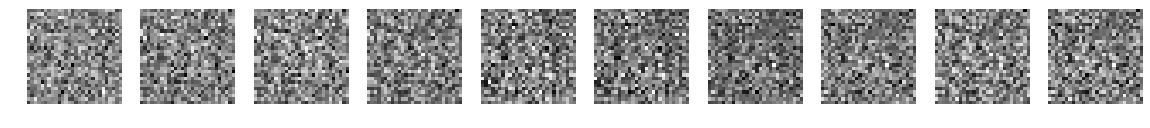

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_0.png


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


400 [D loss: 0.788924, acc: 56.25%] [G acc: 0.281250, mse: 0.062528]
800 [D loss: 0.635753, acc: 57.81%] [G acc: 0.406250, mse: 0.060970]
1200 [D loss: 0.669518, acc: 54.69%] [G acc: 0.406250, mse: 0.054095]
1600 [D loss: 0.646340, acc: 65.62%] [G acc: 0.218750, mse: 0.055654]
2000 [D loss: 0.689747, acc: 59.38%] [G acc: 0.437500, mse: 0.054913]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/2000.png


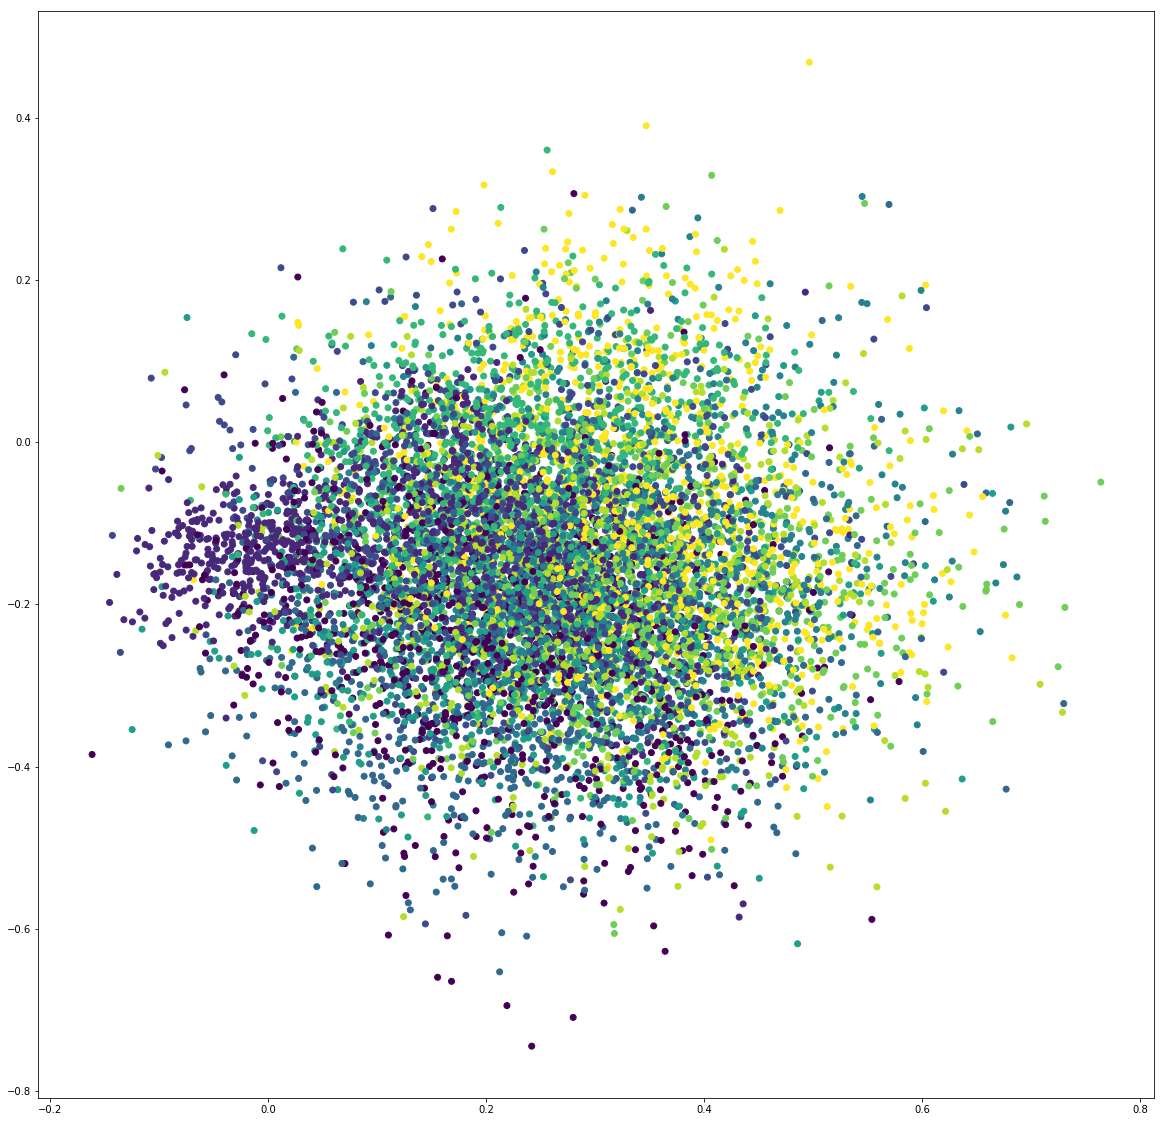

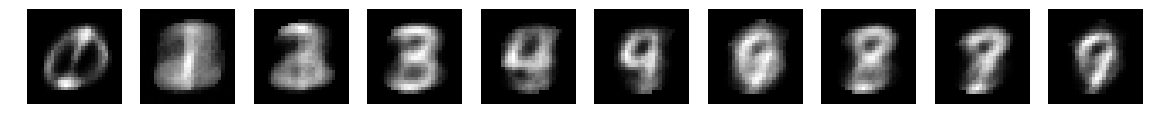

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_2000.png
2400 [D loss: 0.646425, acc: 56.25%] [G acc: 0.343750, mse: 0.048345]
2800 [D loss: 0.667406, acc: 51.56%] [G acc: 0.500000, mse: 0.054138]
3200 [D loss: 0.711015, acc: 54.69%] [G acc: 0.375000, mse: 0.054251]
3600 [D loss: 0.690361, acc: 50.00%] [G acc: 0.500000, mse: 0.053853]
4000 [D loss: 0.668916, acc: 60.94%] [G acc: 0.593750, mse: 0.056491]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/4000.png


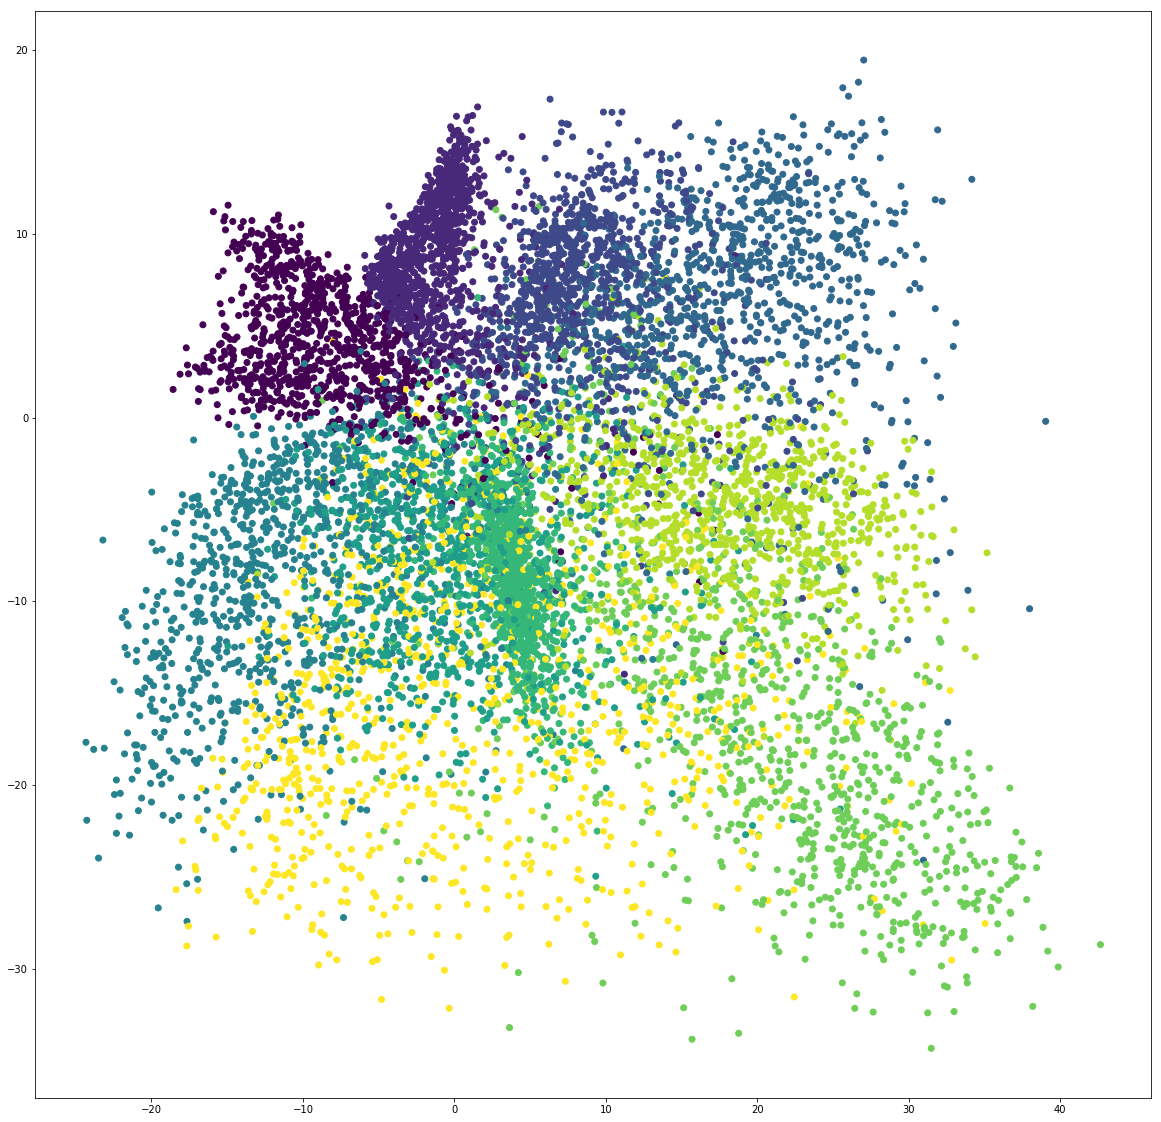

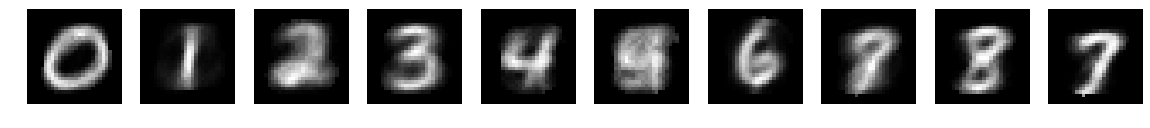

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_4000.png
4400 [D loss: 0.640391, acc: 57.81%] [G acc: 0.562500, mse: 0.052653]
4800 [D loss: 0.686392, acc: 48.44%] [G acc: 0.250000, mse: 0.050943]
5200 [D loss: 0.668437, acc: 53.12%] [G acc: 0.437500, mse: 0.052220]
5600 [D loss: 0.671152, acc: 51.56%] [G acc: 0.437500, mse: 0.049385]
6000 [D loss: 0.700513, acc: 48.44%] [G acc: 0.468750, mse: 0.045822]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/6000.png


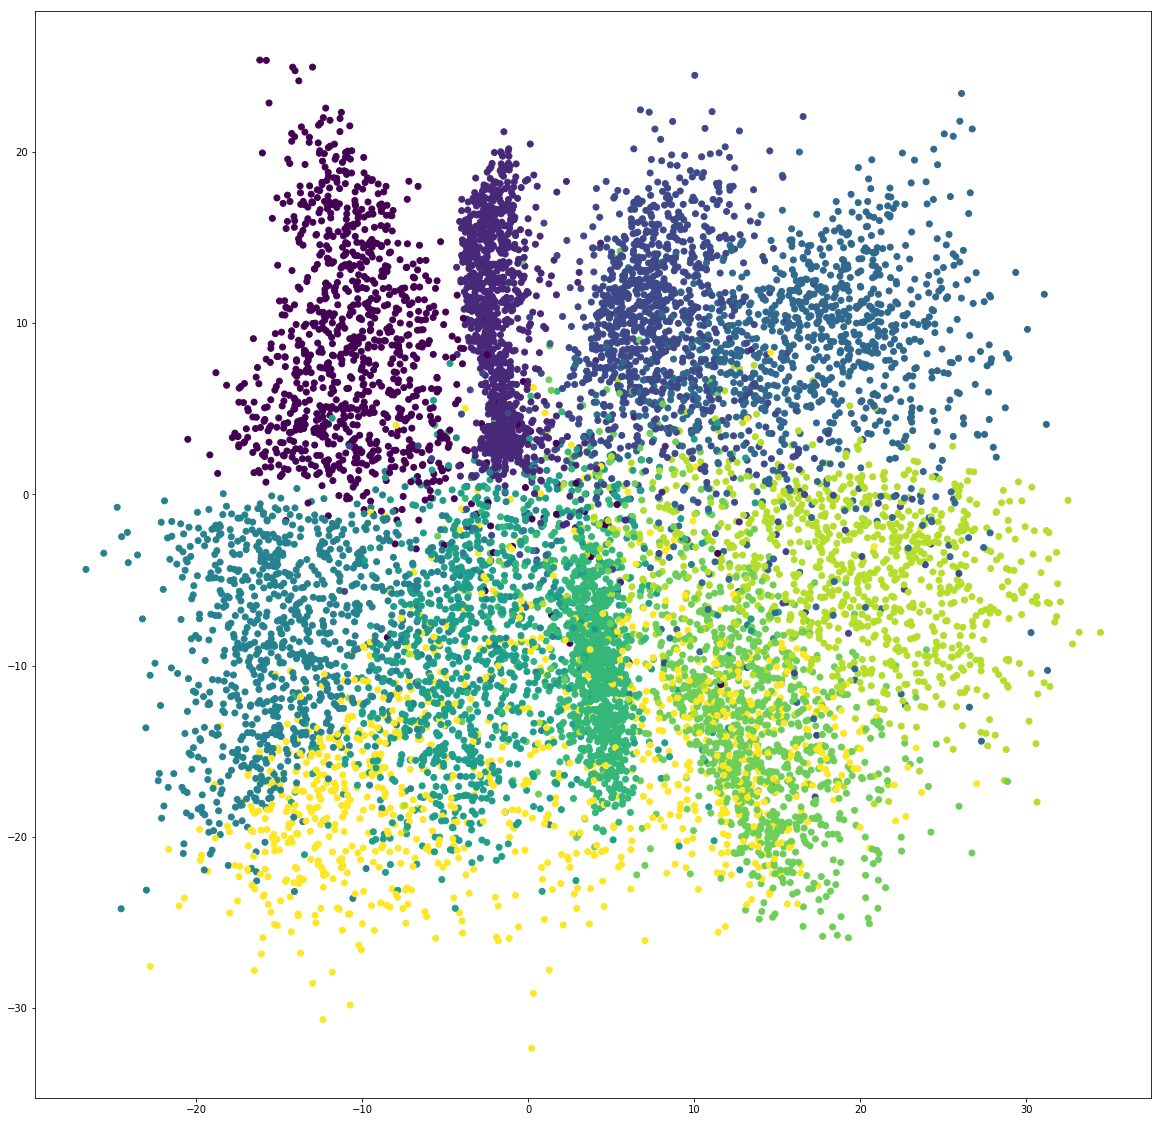

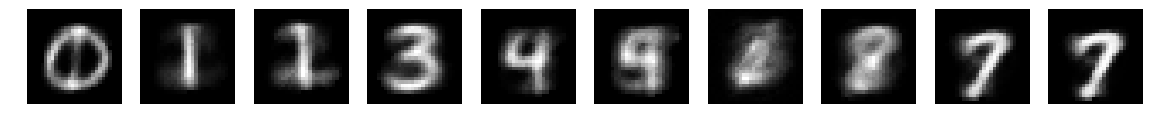

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_6000.png
6400 [D loss: 0.673431, acc: 51.56%] [G acc: 0.281250, mse: 0.044839]
6800 [D loss: 0.643427, acc: 62.50%] [G acc: 0.562500, mse: 0.047837]
7200 [D loss: 0.680547, acc: 60.94%] [G acc: 0.375000, mse: 0.054443]
7600 [D loss: 0.691720, acc: 50.00%] [G acc: 0.437500, mse: 0.052240]
8000 [D loss: 0.650857, acc: 56.25%] [G acc: 0.437500, mse: 0.047394]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/8000.png


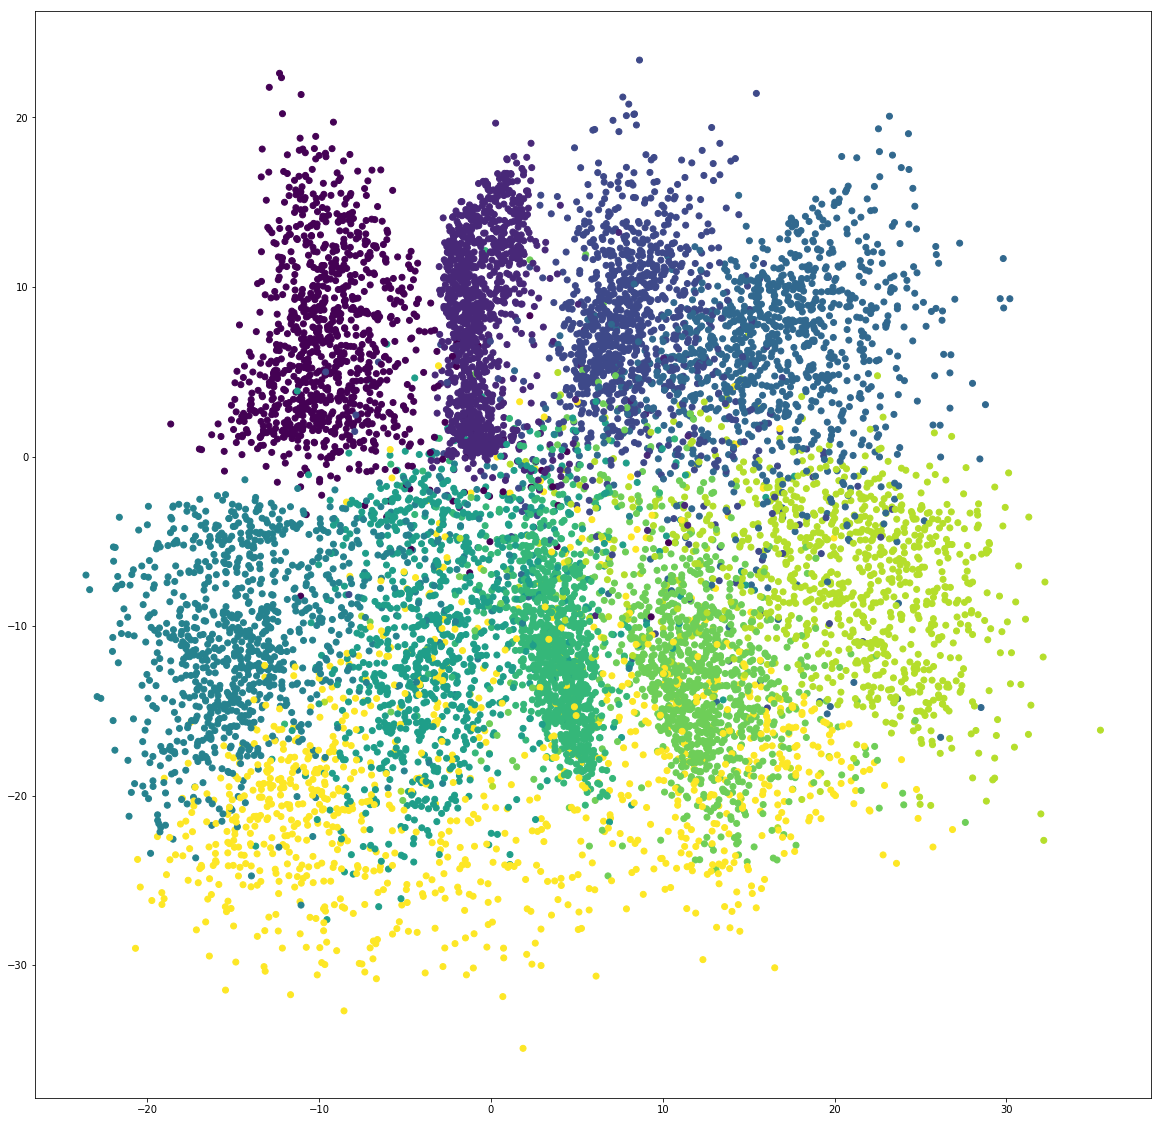

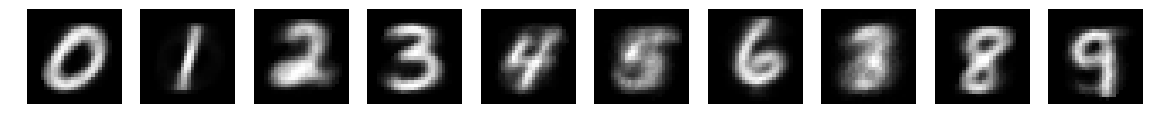

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_8000.png
8400 [D loss: 0.661790, acc: 57.81%] [G acc: 0.468750, mse: 0.044434]
8800 [D loss: 0.627933, acc: 59.38%] [G acc: 0.312500, mse: 0.055013]
9200 [D loss: 0.668750, acc: 51.56%] [G acc: 0.468750, mse: 0.049673]
9600 [D loss: 0.678106, acc: 56.25%] [G acc: 0.562500, mse: 0.045857]
10000 [D loss: 0.696420, acc: 51.56%] [G acc: 0.531250, mse: 0.048086]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/10000.png


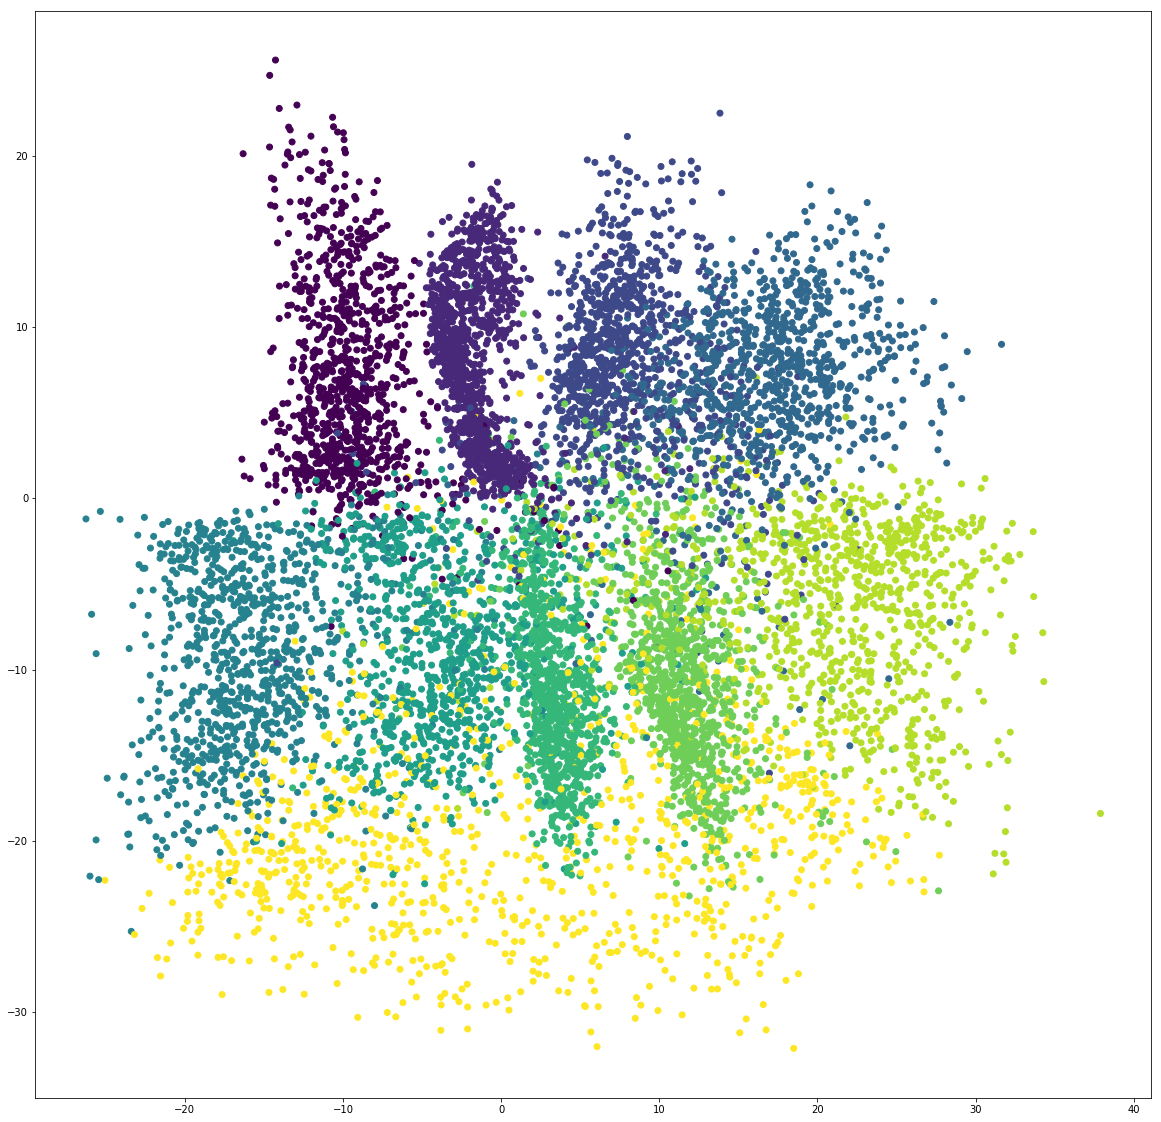

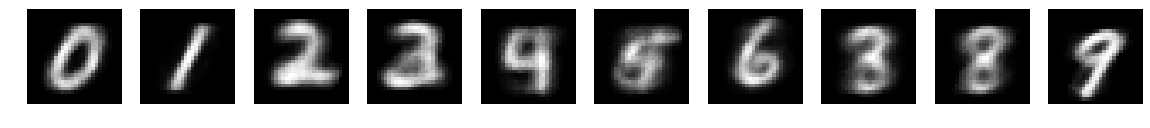

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_10000.png
10400 [D loss: 0.668862, acc: 64.06%] [G acc: 0.343750, mse: 0.049378]
10800 [D loss: 0.673825, acc: 51.56%] [G acc: 0.468750, mse: 0.048519]
11200 [D loss: 0.666314, acc: 59.38%] [G acc: 0.500000, mse: 0.045407]
11600 [D loss: 0.691656, acc: 45.31%] [G acc: 0.625000, mse: 0.051735]
12000 [D loss: 0.658409, acc: 54.69%] [G acc: 0.406250, mse: 0.044244]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/12000.png


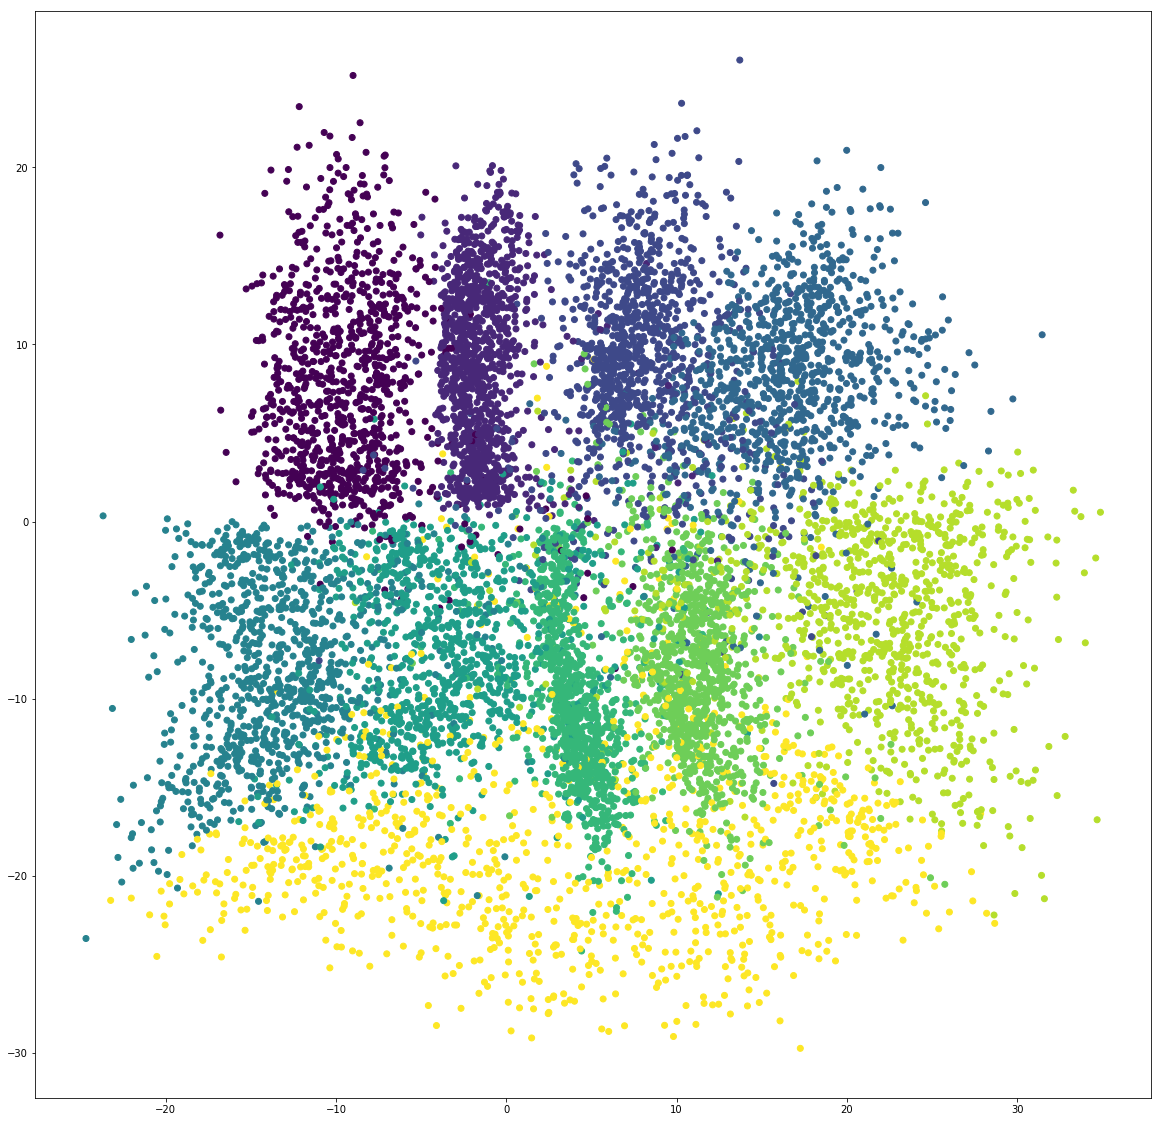

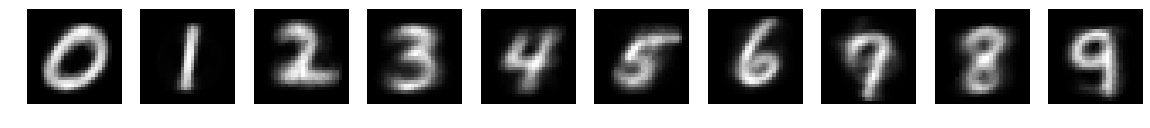

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_12000.png
12400 [D loss: 0.680569, acc: 54.69%] [G acc: 0.312500, mse: 0.044421]
12800 [D loss: 0.681800, acc: 51.56%] [G acc: 0.562500, mse: 0.047240]
13200 [D loss: 0.648068, acc: 56.25%] [G acc: 0.468750, mse: 0.043405]
13600 [D loss: 0.655883, acc: 68.75%] [G acc: 0.375000, mse: 0.043623]
14000 [D loss: 0.698960, acc: 57.81%] [G acc: 0.437500, mse: 0.042812]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/14000.png


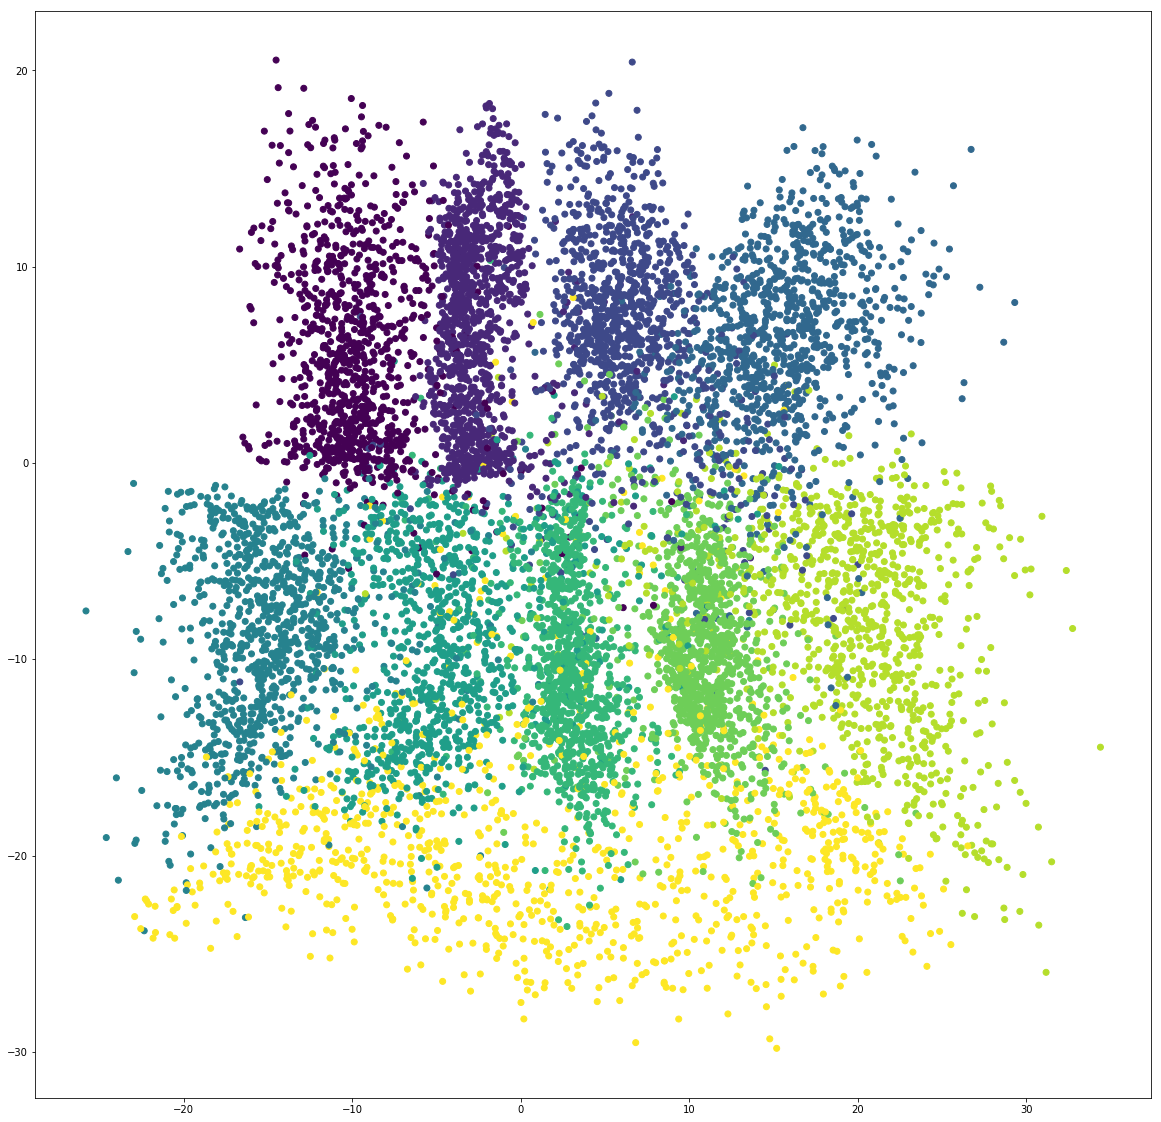

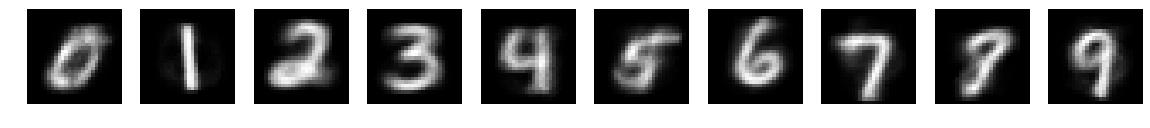

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_14000.png
14400 [D loss: 0.660761, acc: 54.69%] [G acc: 0.312500, mse: 0.044558]
14800 [D loss: 0.667687, acc: 53.12%] [G acc: 0.562500, mse: 0.045158]
15200 [D loss: 0.647741, acc: 59.38%] [G acc: 0.343750, mse: 0.050268]
15600 [D loss: 0.650695, acc: 54.69%] [G acc: 0.687500, mse: 0.053473]
16000 [D loss: 0.680794, acc: 57.81%] [G acc: 0.562500, mse: 0.044754]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/16000.png


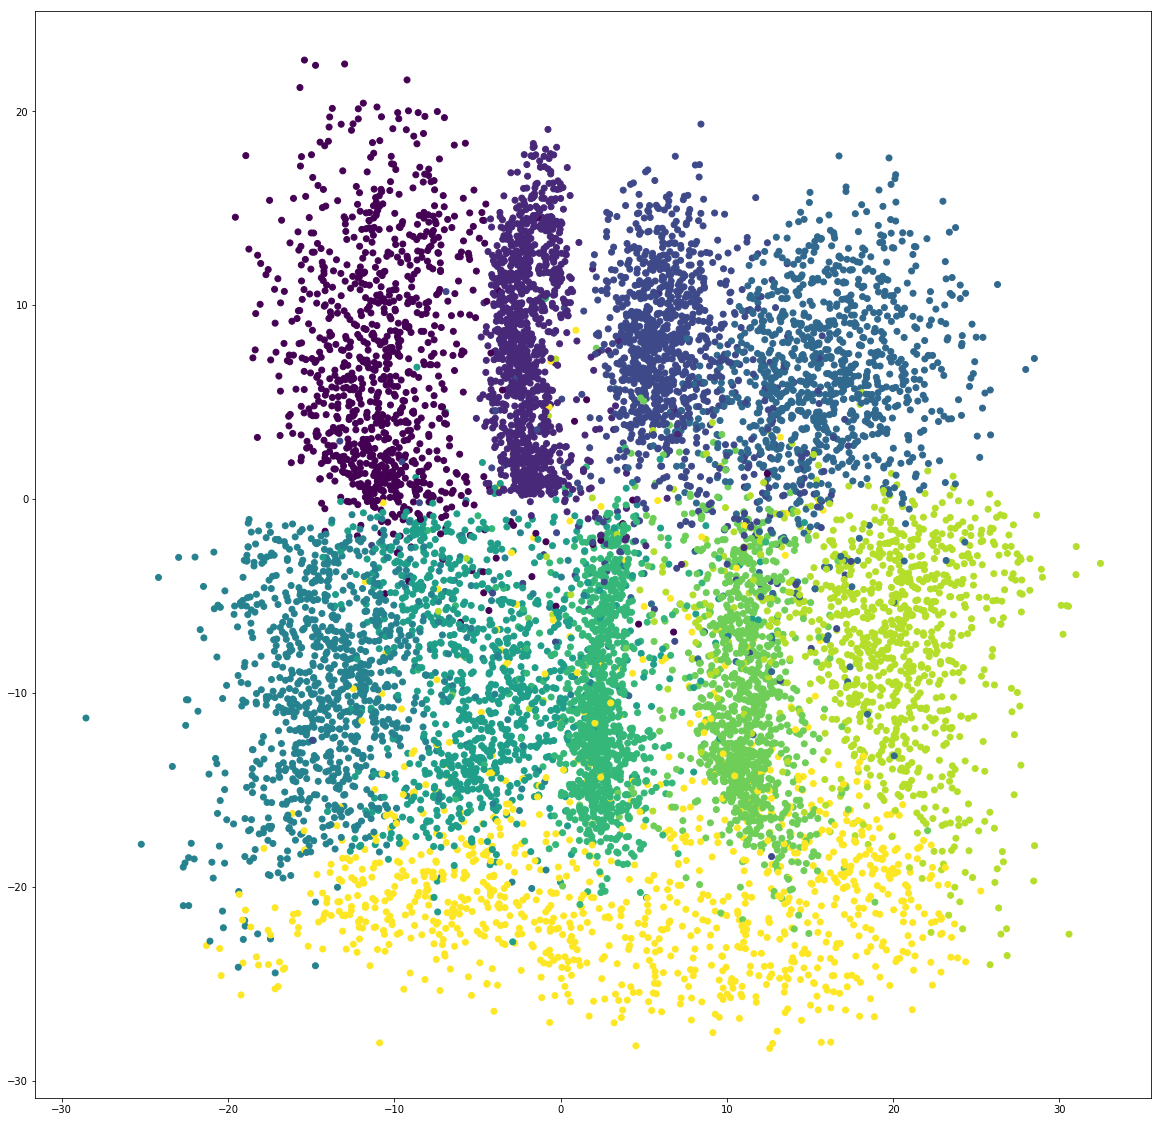

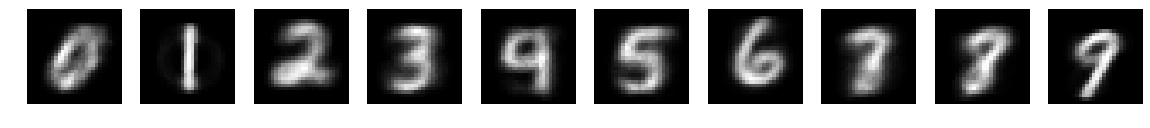

Save latent map as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/map_16000.png
16400 [D loss: 0.656744, acc: 53.12%] [G acc: 0.625000, mse: 0.058965]
16800 [D loss: 0.699332, acc: 50.00%] [G acc: 0.343750, mse: 0.040976]
17200 [D loss: 0.688036, acc: 48.44%] [G acc: 0.406250, mse: 0.045507]
17600 [D loss: 0.721985, acc: 48.44%] [G acc: 0.625000, mse: 0.045993]
18000 [D loss: 0.666749, acc: 53.12%] [G acc: 0.375000, mse: 0.044614]
Save imagegrid as: /content/drive/My Drive/ML_Coffee_CERN/images/SSAAE/18000.png


In [0]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
idx_unlabel = np.random.randint(0, x_train.shape[0], 20000)
y_train[idx_unlabel] = 10
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

# Load classes from module and start the training
ann = my_module.SSAAE(type='cool')
vecs, b = ann.generateRandomVectors(1000 * list(range(10)))
plt.scatter(vecs[:, 0], vecs[:, 1])
ann.train(x_train, y_train, x_test, y_test, epochs=int(2e4), 
          save_interval = 2000, batch_size=32)

# Print the results
vecs, b = ann.generateRandomVectors(1000 * list(range(10)))
generated = ann.decoder.predict(vecs)
print(generated.shape)
L = helpers.approximateLogLiklihood(generated, x_test)
print("Log Likelihood")
print(L)